# DEMO #1 Introdução a Aprendizagem de Máquina

## Demonstração das ferramentas e do _pipeline_ de _Machine Learning_

### Ferramentas

Inicialmente vamos instalar as bibliotecas que serão utilizadas. Depois de instalado `Python`, instalamos:

- `numpy`: Ferramentas numéricas
- `scikit-learn`: Algoritimos de classificação e _helpers_ para ML
- `tensorflow`: Biblioteca para grafos de fluxo computacional
- `keras`: API de alto nível para Deep Learning
- `matplotlib`: Biblioteca para plotar imagens e gráficos

Com o comando:

```
pip install numpy scikit-learn tensorflow keras matplotlib
```

In [1]:
# testamos a instalação importando as ferramentas
%matplotlib inline
import tensorflow as tf
import numpy as np
import keras
import sklearn
import matplotlib.pyplot as plt

Using TensorFlow backend.


### 1º Parte do Pipeline: Dados de Entrada

Vamos usar um dataset chamado MNIST; ele é composto de 60 mil imagens dígitos escritos manualmente, preparados para serem classificados entre 0, 1, 2... 10

In [4]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Data Shape: ", x_train.shape)
print("Labels Shape: ", y_train.shape)

Data Shape:  (60000, 28, 28)
Labels Shape:  (60000,)


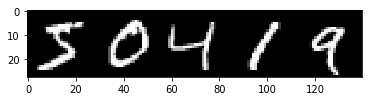

In [6]:
# plot some samples from the dataset
plt.imshow(np.concatenate((x_train[0:5]), axis=1), cmap='gray')

### 2º Parte do Pipeline: Extração de Características

Precisamos extraír características dessas imagens, alguma sugestão? Vamos criar uma função implementando nossa ideia

In [9]:
def extract_mean_pixel(x):
    mean_pixel = np.mean(x)
    return [mean_pixel]

In [10]:
# let's first reshape our images so that they become vectors
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# extract features from each sample
training_features = np.array([extract_mean_pixel(x) for x in x_train])
testing_features = np.array([extract_mean_pixel(x) for x in x_test])

print(training_features)

[[35.10841837]
 [39.6619898 ]
 [24.7997449 ]
 ...
 [28.22959184]
 [26.05612245]
 [26.68367347]]


### 3º Parte do Pipeline: Algotitimo de Classificação

Para demonstração, vamos arbitrariamente escolher o algoritimo **SVM**

In [11]:
from sklearn.svm import SVC as AClassificationAlgorithm

classification_algorithm = AClassificationAlgorithm()

# train on our training set
classification_algorithm.fit(training_features, y_train)

# and we test on the testing set
expected_result = y_test
predicted_result = classification_algorithm.predict(testing_features)

### Última parte: Custo, Risco e Generalização

In [12]:
# 0-1 Loss
zero_one_loss = expected_result != predicted_result
print("0-1 Loss: ", zero_one_loss)

0-1 Loss:  [ True  True False ...  True  True  True]


In [13]:
zero_one_risk = np.sum(zero_one_loss)/len(testing_features)
print("0-1 Risk: ", zero_one_risk)

0-1 Risk:  0.7705


Mas de que tipo de risco estamos falando aqui? **Risco em dados de teste**

In [15]:
# risk on training data
training_data_loss = classification_algorithm.predict(training_features) != y_train
training_data_risk = np.sum(training_data_loss)/len(x_train)
print("Training Data Risk: ", training_data_risk)

Training Data Risk:  0.7668833333333334


Assumindo que nossos dados de teste são um bom chute para os dados reais, podemos calcular a generalização

In [ ]:
# calculate generalization of our classifier
approximate_real_risk = zero_one_risk
generalization = np.abs(training_data_risk - approximate_real_risk)
print("Generalization: ", generalization)